In [1]:
import pandas as pd

In [2]:
ratings_pd = pd.read_csv("Resources/ratings.csv")
ratings_pd.head()
ratings_pd.sample(n=5)

,userId,movieId,rating,timestamp
23709693,246082,592,4.0,833090212
10026320,103443,3328,4.0,1045851683
6538834,67497,260,4.0,944943590
3843961,40041,4262,4.5,1199461511
20424831,212236,4144,4.0,1429152427


In [3]:
movies_metadata_pd = pd.read_csv("Resources/movies_metadata.csv", low_memory=False)
movies_metadata_pd.head()
movies_metadata_pd.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
2632,False,NaN,30000,"[{'id': 35, 'name': 'Comedy'}]",NaN,24452,tt0054033,en,The Little Shop of Horrors,Black comedy about a young man who creates a c...,...,1960-09-14,0.0,70.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The funniest picture of the year!,The Little Shop of Horrors,False,6.2,78.0
29603,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://oc87.com/OC87.html,105972,tt1550557,en,"OC87: The Obsessive Compulsive, Major Depressi...",Director Bud Clayman documents his struggle wi...,...,2012-05-25,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"OC87: The Obsessive Compulsive, Major Depressi...",False,7.0,3.0
22928,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,87587,tt1691154,en,The Pill,Worried that he has gotten the free-spirited M...,...,2011-12-16,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Pill,False,5.6,49.0
25507,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...",NaN,255906,tt0076026,it,Il figlio dello sceicco,NaN,...,1977-02-16,0.0,NaN,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Il figlio dello sceicco,False,4.5,2.0
31567,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,262789,tt3628598,it,Ti ricordi di me?,The Rascal and The Scatterbrain - is their lov...,...,2014-04-03,0.0,91.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Ti ricordi di me?,False,6.9,46.0


In [4]:
movies_metadata_pd.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [5]:
movies_metadata_pd = movies_metadata_pd[movies_metadata_pd['adult'] == 'False'].drop('adult',axis='columns')

In [6]:
movies_metadata_pd['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [7]:
movies_metadata_pd['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [8]:
movies_metadata_pd['video'] = movies_metadata_pd['video'] == 'True'

In [9]:
movies_metadata_pd['budget'] = movies_metadata_pd['budget'].astype(int)
movies_metadata_pd['id'] = pd.to_numeric(movies_metadata_pd['id'], errors='raise')
movies_metadata_pd['popularity'] = pd.to_numeric(movies_metadata_pd['popularity'], errors='raise')

In [10]:
movies_metadata_pd['release_date'] = pd.to_datetime(movies_metadata_pd['release_date'])

In [11]:
ratings_pd.info(null_counts=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15328\1290786186.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings_pd.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [12]:
pd.to_datetime(ratings_pd['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [13]:
ratings_pd['timestamp'] = pd.to_datetime(ratings_pd['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

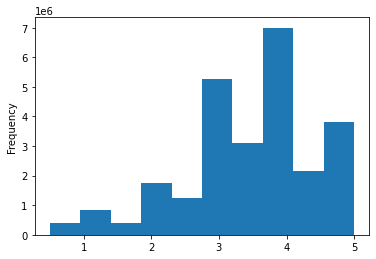

In [15]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings_pd['rating'].plot(kind='hist')
ratings_pd['rating'].describe()

In [16]:
movies_df = pd.merge(wiki_movies_df, movies_metadata_pd, on='imdb_id', suffixes=['_wiki','_kaggle'])

NameError: name 'wiki_movies_df' is not defined